In [1]:
import pandas as pd
import numpy as np
import re
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

In [2]:
sale = pd.read_pickle('sales_latest_update.pkl')

In [4]:
inventory = pd.read_pickle('inventory.pkl')

In [15]:
inventory_nohand = pd.read_excel('inventorynohand.xlsx')

In [16]:
inventory_nohand.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Style_Color
0,DTA1A9500,IV,seed bead anklet,2016-04-12,-144,0,DTA1A9500IV
1,DTA1A9500,IV,seed bead anklet,2016-04-12,144,0,DTA1A9500IV
2,DTA1A9500,MUL,seed bead anklet,2016-04-12,-144,0,DTA1A9500MUL
3,DTA1A9500,MUL,seed bead anklet,2016-04-12,144,0,DTA1A9500MUL
4,DTA1A9500,TQ,seed bead anklet,2016-04-12,-144,0,DTA1A9500TQ


In [25]:
code = list(inventory_nohand['Style_Color'])

In [27]:
inventory['Style_Color'] = inventory['STYLE#'] + inventory['COLOR']

In [29]:
inventory.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Style_Color
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0,DTA1A9500IV
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0,DTA1A9500IV
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0,DTA1A9500MUL
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0,DTA1A9500MUL
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0,DTA1A9500TQ


In [28]:
onhand_inventory = inventory.loc[~sale['Style_Color'].isin(code)]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [7]:
inventoryOnHand = inventory.loc[inventory['On-Hand'] != 0]

In [33]:
inventory["On-Hand"].apply(lambda x: float(x))

ValueError: could not convert string to float: '-1,320.00'

In [10]:
inventoryOnHand['On-Hand']

0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                0
29                0
30                0
31                0
32                0
33                0
34                0
35                0
36                0
37                0
38                0
39                0
40                0
41                0
42                0
43                0
44                0
45                0
46                0
47                0
48                0
49                0


In [19]:
inventory['Style_Color'] = inventory['STYLE#'] + inventory['COLOR']

In [5]:
del(inventory['Categories'])

In [6]:
inventory.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0


In [26]:
inventory.to_csv('inventory_ko.csv')

In [41]:
new_inventory = pd.read_csv('inventory_ko.csv')

In [42]:
new_inventory.head(5)

,Unnamed: 0,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Style_Color
0,0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0.0,DTA1A9500IV
1,1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0.0,DTA1A9500IV
2,2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0.0,DTA1A9500MUL
3,3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0.0,DTA1A9500MUL
4,4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0.0,DTA1A9500TQ


In [37]:
inventory.dtypes

STYLE#         object
COLOR          object
Description    object
LAST RCVD      object
Qty            object
On-Hand        object
Style_Color    object
dtype: object

In [45]:
inventory.columns[inventory.isnull().any()]

Index(['COLOR', 'Description', 'LAST RCVD', 'Qty', 'On-Hand', 'Style_Color'], dtype='object')

In [46]:
inventory[inventory['On-Hand'].isnull()]

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Style_Color
144725,DT22968483,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
inventory = inventory[inventory.Qty.notnull()]

In [49]:
inventory.columns[inventory.isnull().any()]

Index(['COLOR', 'Description', 'Style_Color'], dtype='object')

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Style_Color
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0,DTA1A9500IV
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0,DTA1A9500IV
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0,DTA1A9500MUL
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0,DTA1A9500MUL
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0,DTA1A9500TQ


In [59]:
inventoryOnHand = inventory[inventory['On-Hand'] != 0]

In [60]:
inventory['On-Hand'] = inventory['On-Hand'].replace(',', '')

In [61]:
inventoryOnHand.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Style_Color
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0,DTA1A9500IV
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0,DTA1A9500IV
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0,DTA1A9500MUL
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0,DTA1A9500MUL
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0,DTA1A9500TQ


In [56]:
inventory['On-Hand'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '-1,320.00'

In [51]:
inventoryOnHand

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Style_Color
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0,DTA1A9500IV
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0,DTA1A9500IV
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0,DTA1A9500MUL
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0,DTA1A9500MUL
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0,DTA1A9500TQ
5,DTA1A9500,TQ,seed bead anklet,4/12/2016,144,0,DTA1A9500TQ
6,DTA1B2029,WG-COR,row wood bead stretch br,4/4/2016,120,0,DTA1B2029WG-COR
7,DTA1B2029,WG-COR,row wood bead stretch br,4/4/2016,-12,0,DTA1B2029WG-COR
8,DTA1B2029,WG-COR,row wood bead stretch br,4/6/2016,-12,0,DTA1B2029WG-COR
9,DTA1B2029,WG-COR,row wood bead stretch br,4/11/2016,240,0,DTA1B2029WG-COR


In [22]:
inventory.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Style_Color
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0,DTA1A9500IV
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0,DTA1A9500IV
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0,DTA1A9500MUL
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0,DTA1A9500MUL
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0,DTA1A9500TQ


In [322]:
inventory['Qty'] = inventory['Qty'].apply(pd.to_numeric, errors = 'ignore')

In [323]:
inventory.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0


In [324]:
inventory['Style_Color'] = inventory['STYLE#']+inventory['COLOR']

In [325]:
del(inventory['STYLE#'])

In [326]:
combined_table = pd.merge(inventory, new_sale, on = 'Style_Color')

In [329]:
combined_table.shape

(33907500, 36)

In [334]:
combined_table.head(5)

,COLOR_x,Description,LAST RCVD_x,Qty,On-Hand,Style_Color,STYLE#,COLOR_y,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD_y,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Revenue,cost_per_unit,Cost,Gross_Profit
0,IV,seed bead anklet,4/12/2016,-144,0,DTA1A9500IV,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.0,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,576.0,2.0,288.0,288.0
1,IV,seed bead anklet,4/12/2016,144,0,DTA1A9500IV,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.0,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,576.0,2.0,288.0,288.0
2,MUL,seed bead anklet,4/12/2016,-144,0,DTA1A9500MUL,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.0,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,576.0,2.0,288.0,288.0
3,MUL,seed bead anklet,4/12/2016,144,0,DTA1A9500MUL,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.0,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,576.0,2.0,288.0,288.0
4,TQ,seed bead anklet,4/12/2016,-144,0,DTA1A9500TQ,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.0,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,576.0,2.0,288.0,288.0


In [335]:
no_onhand = combined_table.loc[combined_table['On-Hand'] == 0]

KeyError: MemoryError()

In [333]:
 re.sub('[\,]', '', combined_table['Qty'])

TypeError: expected string or bytes-like object

In [332]:
combined_table.dtypes

COLOR_x                    object
Description                object
LAST RCVD_x                object
Qty                        object
On-Hand                    object
Style_Color                object
STYLE#                     object
COLOR_y                    object
DESCRIPTION                object
CUST #                     object
INVC DATE          datetime64[ns]
QTY                         int64
UNIT PRICE                float64
EXT-AMT                    object
REASON                     object
IMPORT HANDMADE            object
MANUFACTORS                object
State_sold                 object
ZIP_sold                   object
RELEASED YEAR              object
Seasos                     object
Season target              object
LAST RCVD_y                object
FIRST RCVD                 object
LAST INVOICED              object
FIRST INVOICED             object
Categories                 object
Categories1                object
Attribute                  object
material_style

In [ ]:
inventory = inventory

In [317]:
inventory.dtypes

STYLE#          object
COLOR           object
Description     object
LAST RCVD       object
Qty             object
On-Hand         object
Categories     float64
dtype: object

In [318]:
del(inventory['Categories'])

In [319]:
inventory.dtypes

STYLE#         object
COLOR          object
Description    object
LAST RCVD      object
Qty            object
On-Hand        object
dtype: object

In [320]:
inventory.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0


In [312]:
inventory.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Categories
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0,NaN
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0,NaN
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0,NaN
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0,NaN
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0,NaN


In [4]:
sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0
3,DTA1B2029,WG-COR,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-COR,39.0
4,DTA1B2029,WG-COR,row wood bead stretch br,GMA01,2016-08-22,24,3.25,$ 78.00,NaN,IMPORT,NOBLES,0,0,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,78.0


In [ ]:
inventory.head(5)

In [5]:
Return_orders = sale.loc[sale['QTY'] < 0]

In [259]:
Return_orders.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue,Potential_rev_lost
6,DTA1B2029,WG-COR,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,-39.0,39.0
13,DTA1B2029,WG-CRM,row pearl bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/4/16,"[row, pearl, bead, stretch, br]",EarRings,row pearl bead stretch br,bead,2016,8,DTA1B2029WG-CRM,-39.0,39.0
27,DTA1B2029,WG-GRY,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/4/16,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-GRY,-39.0,39.0
50,DTA1B2029,WG-JET,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/12/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-JET,-39.0,39.0
58,DTA1B2029,WG-LBR,row wood bead stretch br,ADE001,2016-07-20,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,AZ,85027,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/8/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,7,DTA1B2029WG-LBR,-39.0,39.0


In [260]:
Return_orders['Quarter'] = Return_orders['month']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

In [263]:
Return_orders.loc[Return_orders['Quarter'].isin(Q1),'Quarter']='Q1'
Return_orders.loc[Return_orders['Quarter'].isin(Q2),'Quarter']='Q2'
Return_orders.loc[Return_orders['Quarter'].isin(Q3),'Quarter']='Q3'
Return_orders.loc[Return_orders['Quarter'].isin(Q4),'Quarter']='Q4'

C:\Users\Bird_\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [264]:
Return_orders.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue,Potential_rev_lost,Quarter
6,DTA1B2029,WG-COR,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,-39.0,39.0,Q3
13,DTA1B2029,WG-CRM,row pearl bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/4/16,"[row, pearl, bead, stretch, br]",EarRings,row pearl bead stretch br,bead,2016,8,DTA1B2029WG-CRM,-39.0,39.0,Q3
27,DTA1B2029,WG-GRY,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/4/16,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-GRY,-39.0,39.0,Q3
50,DTA1B2029,WG-JET,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/12/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-JET,-39.0,39.0,Q3
58,DTA1B2029,WG-LBR,row wood bead stretch br,ADE001,2016-07-20,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,AZ,85027,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/8/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,7,DTA1B2029WG-LBR,-39.0,39.0,Q3


In [268]:
Quarter_defect = pd.DataFrame(Return_orders.groupby(['Quarter'])['Potential_rev_lost'].sum()).sort_values(by = 'Potential_rev_lost', ascending = False)

In [269]:
Quarter_defect.reset_index()

,Quarter,Potential_rev_lost
0,Q1,66645.90
1,Q2,53693.25
2,Q3,34589.18
3,Q4,21699.80


In [7]:
sale.head()

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0
3,DTA1B2029,WG-COR,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-COR,39.0
4,DTA1B2029,WG-COR,row wood bead stretch br,GMA01,2016-08-22,24,3.25,$ 78.00,NaN,IMPORT,NOBLES,0,0,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,78.0


In [10]:
sale.loc[sale['REASON'] == isnull.()]

SyntaxError: invalid syntax (<ipython-input-10-b4dd9b68feb0>, line 1)

In [ ]:
Return_orders.shape

In [6]:
Return_orders['QTY'] = abs(Return_orders['QTY'])

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
Return_orders['Potential_rev_lost'] = Return_orders['QTY']*Return_orders['UNIT PRICE']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [258]:
Return_orders

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue,Potential_rev_lost
6,DTA1B2029,WG-COR,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,-39.00,39.00
13,DTA1B2029,WG-CRM,row pearl bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/4/16,"[row, pearl, bead, stretch, br]",EarRings,row pearl bead stretch br,bead,2016,8,DTA1B2029WG-CRM,-39.00,39.00
27,DTA1B2029,WG-GRY,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/4/16,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-GRY,-39.00,39.00
50,DTA1B2029,WG-JET,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/12/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-JET,-39.00,39.00
58,DTA1B2029,WG-LBR,row wood bead stretch br,ADE001,2016-07-20,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,AZ,85027,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/8/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,7,DTA1B2029WG-LBR,-39.00,39.00
66,DTA1B2029,WG-LBR,row wood bead stretch br,HIS001,2016-08-25,12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/8/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-LBR,-39.00,39.00
114,DTA1B2066,G-IV,multi strand wood bracelet,ADE001,2016-07-20,12,4.75,$ (57.00),RETUR,IMPORT,NOBLES,AZ,85027,2016,2016 1ST,SS16,4/11/16,4/11/16,10/3/18,4/12/16,"[multi, strand, wood, bracelet]",Bracelet,multi strand wood bracelet,wood,2016,7,DTA1B2066G-IV,-57.00,57.00
147,DTA1B2072,BL-HOW,natural stone stretch br,BEL007,2016-08-10,24,3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,5/23/16,4/26/16,10/3/18,4/29/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8,DTA1B2072BL-HOW,-90.00,90.00
159,DTA1B2072,CHA-RQ,natural stone stretch br,BEL007,2016-08-10,24,3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,4/26/16,4/11/16,10/3/18,4/11/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8,DTA1B2072CHA-RQ,-90.00,90.00
172,DTA1B2072,GRY-JET,natural stone stretch br,BEL007,2016-08-10,24,3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,5/23/16,5/23/16,10/3/18,6/16/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8,DTA1B2072GRY-JET,-90.00,90.00


In [ ]:
pd.DataFrame(Return_orders.groupby(['year'])['Potential_rev_lost'].sum())

In [8]:
state_by_lost = pd.DataFrame(Return_orders.groupby(['State_sold'])['Potential_rev_lost'].sum()).sort_values(by = 'Potential_rev_lost', ascending = False)

In [9]:
state_by_lost = state_by_lost.head(10).reset_index()

In [11]:
state_by_lost

,State_sold,Potential_rev_lost
0,TX,40722.60
1,GA,34776.82
2,CA,28713.65
3,NC,13009.93
4,NY,9663.98
5,AL,9040.25
6,LA,6018.00
7,OH,5227.00
8,MT,3552.00
9,MS,3406.80


Text(0.5,1,'Top10 Loss revenue by each state')

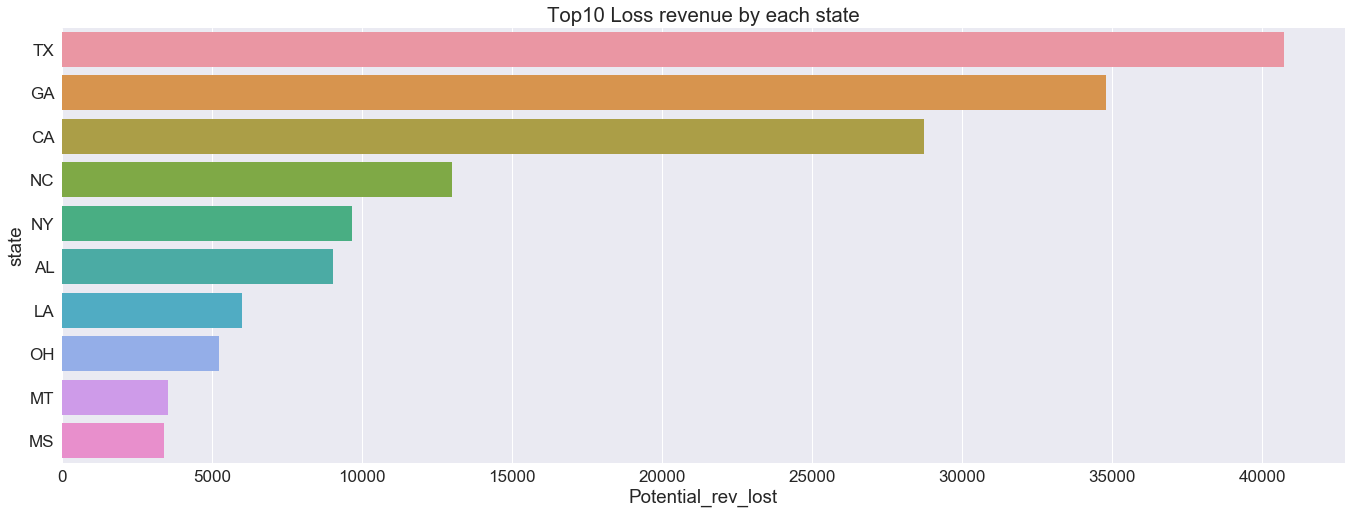

In [116]:
sns.set(font_scale=1.7) 
fig, ax1 = plt.subplots(figsize=(23,8))
# Plot the barplot
sns.barplot(x='Potential_rev_lost', y='State_sold', data=state_by_lost)
# Assign y axis label for bar plot
ax1.set_ylabel('state')
ax1.set_title('Top10 Loss revenue by each state')

In [ ]:
state_by_lost

In [34]:
new_sale

NameError: name 'new_sale' is not defined

In [12]:
Categories_by_lost = pd.DataFrame(Return_orders.groupby(['Categories1'])['Potential_rev_lost'].sum()).sort_values(by = 'Potential_rev_lost', ascending = False)

In [13]:
Quant_by_lost = pd.DataFrame(Return_orders.groupby(['Categories1'])['QTY'].sum()).sort_values(by = 'QTY', ascending = False)

In [14]:
Quant_by_lost = Quant_by_lost.reset_index()

In [15]:
Quant_by_lost

,Categories1,QTY
0,EarRings,33918
1,Necklace,17787
2,Bracelet,8758
3,others,7328
4,Accessories,2667
5,Tassel,1607
6,Charm,555
7,Ring,26


In [270]:
new_sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue,cost_per_unit,Cost,Gross_Profit
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0,2.000,288.0,288.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0,2.000,288.0,288.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0,2.000,288.0,288.0
33,DTA1B2029,WG-IV,row wood bead stretch br,BLU003,2016-04-14,36,3.25,$ 111.15,NaN,IMPORT,NOBLES,NY,10001,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-IV,117.0,1.625,58.5,58.5
34,DTA1B2029,WG-IV,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-IV,39.0,1.625,19.5,19.5


In [301]:
color_qty = pd.DataFrame(new_sale.groupby(['COLOR'])['QTY'].sum()).sort_values(by = 'QTY', ascending = False)

In [306]:
color_qty = color_qty.reset_index()

In [309]:
color_qty_bot = color_qty.tail(10)

In [310]:
color_qty_bot

,COLOR,QTY
2626,PK-BGD,2
2627,HOW-SOD,2
2628,GD-RQSOD,1
2629,WS-LBR,1
2630,SV-GRY-IV,1
2631,LT,1
2632,BLK-JET,1
2633,GRY-AQBLS,1
2634,BLK-WHT,1
2635,GRY_BGD,1


In [277]:
color_qty = color_qty.reset_index().head(10)

In [278]:
color_qty

,COLOR,QTY
0,RG,3361
1,GRY,3171
2,SV-CHA,3168
3,JET,2657
4,GD,2385
5,IV,1889
6,RH,1487
7,GD-GD,1151
8,WG,972
9,BGD,913


Text(0.5,1,'Color Popularity')

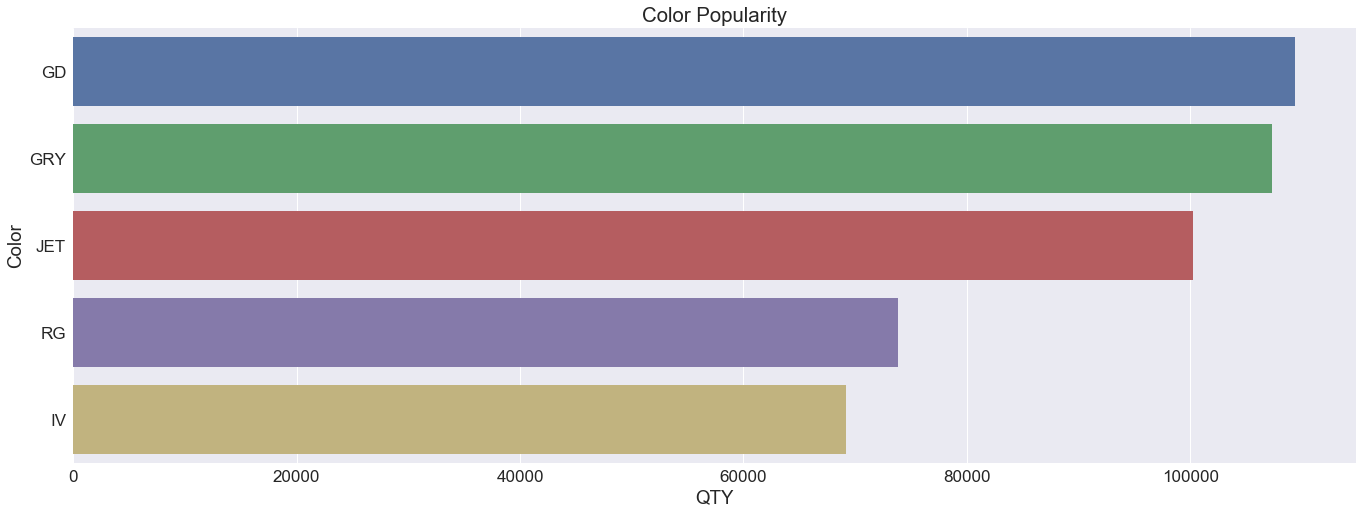

In [297]:
sns.set(font_scale=1.7) 
fig, ax1 = plt.subplots(figsize=(23,8))
# Plot the barplot
sns.barplot(x='QTY', y='COLOR', data=color_qty)
# Assign y axis label for bar plot
ax1.set_ylabel('Color')
ax1.set_title('Color Popularity')

In [16]:
Categories_by_lost = Categories_by_lost.reset_index()

In [17]:
Categories_by_lost

,Categories1,Potential_rev_lost
0,EarRings,66719.91
1,Necklace,58351.90
2,others,18721.10
3,Bracelet,13630.30
4,Accessories,9842.75
5,Tassel,7540.10
6,Charm,1698.32
7,Ring,123.75


Text(0.5,1,'Top10 Loss revenue by each categories')

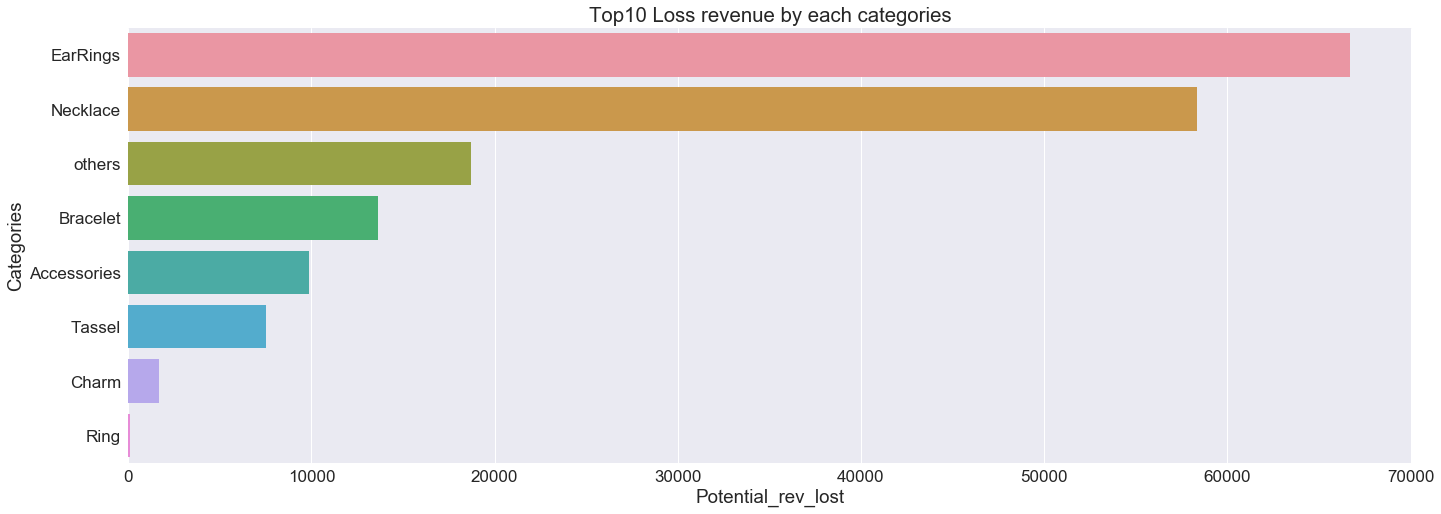

In [257]:
sns.set(font_scale=1.7) 
fig, ax1 = plt.subplots(figsize=(23,8))
# Plot the barplot
sns.barplot(x='Potential_rev_lost', y='Categories1', data=Categories_by_lost)
# Assign y axis label for bar plot
ax1.set_ylabel('Categories')
ax1.set_title('Top10 Loss revenue by each categories')

In [18]:
manufact_lost = pd.DataFrame(Return_orders.groupby(['MANUFACTORS'])['QTY'].sum()).sort_values(by = 'QTY', ascending = False)

In [23]:
manufact_lost = manufact_lost.reset_index()
manufact_lost

,MANUFACTORS,QTY
0,NOBLES,31164
1,ZIMP,10787
2,HD,7565
3,USA MANUFC,7095
4,SEGURU,4233
5,INDI,3635
6,MAR,3054
7,DALI,2031
8,DAZON,861
9,MOON,816


In [20]:
total_quan = pd.DataFrame(sale.groupby(['MANUFACTORS'])['QTY'].sum()).sort_values(by = 'QTY', ascending = False)

In [24]:
total_quan = total_quan.reset_index()

In [25]:
total_quan

,MANUFACTORS,QTY
0,NOBLES,2317949
1,ZIMP,606609
2,HD,362627
3,SEGURU,316634
4,INDI,253209
5,MOON,181558
6,DALI,158083
7,MAR,142209
8,USA MANUFC,117065
9,DAZON,67157


In [32]:
defect_rate = pd.merge(total_quan,manufact_lost, left_on = 'MANUFACTORS', right_on = 'MANUFACTORS')

In [38]:
defect_rate['Defect_rate_%'] = defect_rate['QTY_y']/defect_rate['QTY_x']*100

In [39]:
defect_rate

,MANUFACTORS,QTY_x,QTY_y,Defect_rate_%
0,NOBLES,2317949,31164,1.344464
1,ZIMP,606609,10787,1.778246
2,HD,362627,7565,2.086166
3,SEGURU,316634,4233,1.336875
4,INDI,253209,3635,1.435573
5,MOON,181558,816,0.449443
6,DALI,158083,2031,1.284768
7,MAR,142209,3054,2.147543
8,USA MANUFC,117065,7095,6.060735
9,DAZON,67157,861,1.282070


In [ ]:
sold_sale = pd.DataFrame(new_sale.groupby(['MANUFACTORS'])['QTY'].sum()).sort_values(by = 'QTY', ascending = False)

In [41]:
profit = pd.DataFrame(Return_orders.groupby(['MANUFACTORS'])['Potential_rev_lost'].sum()).sort_values(by = 'Potential_rev_lost', ascending = False)

In [43]:
profit.reset_index()

,MANUFACTORS,Potential_rev_lost
0,NOBLES,65505.51
1,HD,31246.85
2,USA MANUFC,25807.25
3,MAR,14328.25
4,INDI,10514.01
5,ZIMP,8803.86
6,SEGURU,7823.40
7,DALI,5240.25
8,MOON,2011.00
9,DAZON,1700.00


In [44]:
profit_final = pd.merge(defect_rate,profit, on = 'MANUFACTORS')

In [46]:
profit_final['loss_severity'] = profit_final['Potential_rev_lost']/profit_final['QTY_y']

In [59]:
profit_final = profit_final.sort_values(by = 'Defect_rate_%', ascending = False)

No handles with labels found to put in legend.


Text(0,0.5,'Defect%')

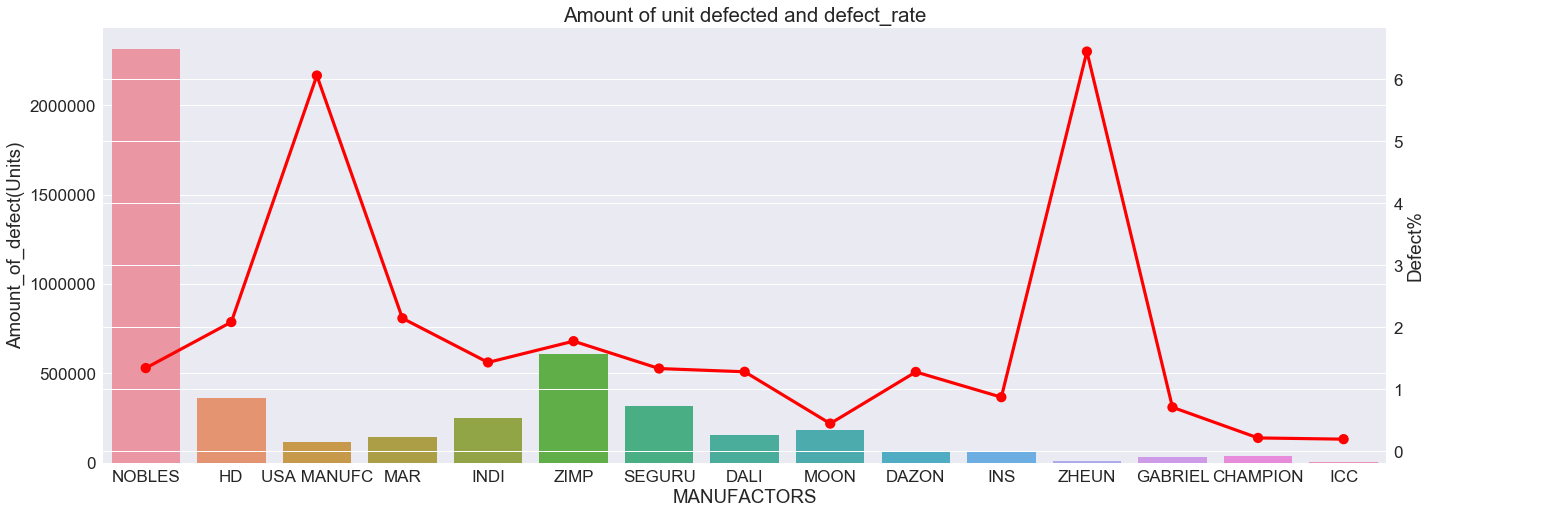

In [92]:
sns.set(font_scale=1.7) 
fig, ax1 = plt.subplots(figsize=(23,8))
# Plot the barplot
sns.barplot(x='MANUFACTORS', y='QTY_x', data=profit_final)
# Assign y axis label for bar plot
ax1.set_ylabel('Amount_of_defect(Units)')
ax1.set_title('Amount of unit defected and defect_rate')
# Position the legen on the right side outside the box
plt.legend(loc=2, bbox_to_anchor=(1.1, 1), ncol=1)
# Create a dual axis
ax2 = ax1.twinx()
# Plot the ponitplot
sns.pointplot(x='MANUFACTORS', y='Defect_rate_%', data=profit_final, ax=ax2, color='r')
ax2.set_ylabel('Defect%')

In [ ]:
fig, ax = plt.subplots(figsize=(23,8))
sns.factorplot(ax = ax, x='MANUFACTORS', y='Defect_rate_%', data=profit_final, kind='bar')

In [72]:
profit_final

,MANUFACTORS,QTY_x,QTY_y,Defect_rate_%,Potential_rev_lost,loss_severity
13,ZHEUN,8003,516,6.447582,1284.00,2.488372
8,USA MANUFC,117065,7095,6.060735,25807.25,3.637385
7,MAR,142209,3054,2.147543,14328.25,4.691634
2,HD,362627,7565,2.086166,31246.85,4.130449
1,ZIMP,606609,10787,1.778246,8803.86,0.816155
4,INDI,253209,3635,1.435573,10514.01,2.892437
0,NOBLES,2317949,31164,1.344464,65505.51,2.101961
3,SEGURU,316634,4233,1.336875,7823.40,1.848193
6,DALI,158083,2031,1.284768,5240.25,2.580133
9,DAZON,67157,861,1.282070,1700.00,1.974448


In [78]:
profit_final = profit_final.sort_values(by = 'Potential_rev_lost', ascending = False)

Text(0.5,1,'Potential Profit loss from defect by each manufacturer')

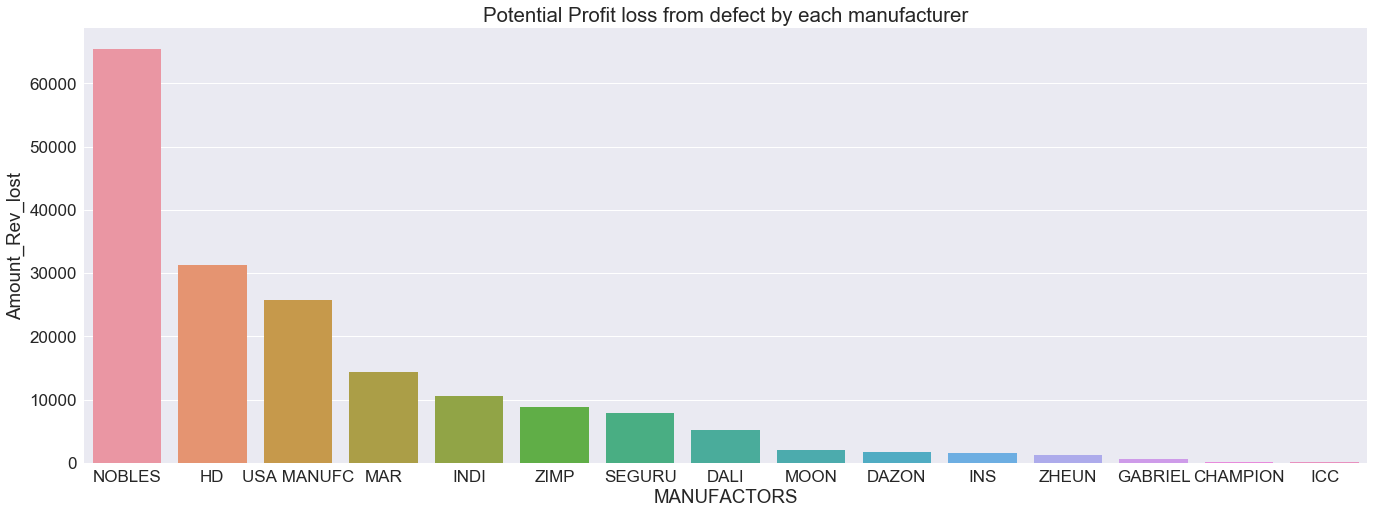

In [83]:
sns.set(font_scale=1.7) 
fig, ax1 = plt.subplots(figsize=(23,8))
# Plot the barplot
sns.barplot(x='MANUFACTORS', y='Potential_rev_lost', data=profit_final)
# Assign y axis label for bar plot
ax1.set_ylabel('Amount_Rev_lost')
ax1.set_title('Potential Profit loss from defect by each manufacturer')
# Position the legen on the right side outside the box
plt.legend(loc=2, bbox_to_anchor=(1.1, 1), ncol=1)
# Create a dual axis
ax2 = ax1.twinx()
# Plot the ponitplot
sns.pointplot(x='MANUFACTORS', y='loss_severity', data=profit_final, ax=ax2, color='r')
# Assign y axis label for point plot
#ax2.set_ylabel('loss_severity')
# Hide the grid for secondary axis

#ax2.grid(False)

In [93]:
import matplotlib.pyplot as plt

In [ ]:
#profit_final = profit_final.sort_values(by = 'Defect_rate_%', ascending = False)

In [ ]:
Lost_categories = pd.merge(Categories_by_lost, Quant_by_lost, on = 'Categories1')
Lost_categories

In [ ]:
Lost_categories['loss_severity'] = Lost_categories['Potential_rev_lost'] / Lost_categories['QTY']

In [ ]:
Lost_categories.sort_values(by = 'loss_severity', ascending = False)

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x="State_sold", y="Potential_rev_lost", data = state_by_lost)

In [ ]:
Reason_lost = pd.DataFrame(Return_orders.groupby(['REASON'])['Potential_rev_lost'].sum()).sort_values(by = 'Potential_rev_lost', ascending = False)

In [ ]:
Reason_lost

In [ ]:
Reason_lost = Reason_lost.reset_index()

In [ ]:
Reason_lost

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x="REASON", y="Potential_rev_lost", data=Reason_lost)

In [17]:
return_order_code = list(Return_orders['Style_Color'])

In [15]:
Return_orders = sale[~sale['REASON'].isnull()]

In [18]:
new_sale = sale.loc[~sale['Style_Color'].isin(return_order_code)]

In [4]:
sale.shape

(111038, 28)

In [5]:
new_sale = sale.loc[~sale['Style_Color'].isin(return_order_code)]

NameError: name 'return_order_code' is not defined

In [108]:
new_sale.shape

(76630, 28)

In [ ]:
new_sale['EXT-AMT'] = sale['EXT-AMT'].str.replace('$', '')
new_sale['EXT-AMT'] = sale['EXT-AMT'].apply(pd.to_numeric, errors = 'ignore')

In [124]:
new_sale['cost_per_unit'] = new_sale['UNIT PRICE'] * 0.5

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_sale.head(5)

In [125]:
new_sale['Cost'] = new_sale['cost_per_unit'] * new_sale['QTY']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_sale.head(5)

In [ ]:
sale['Revenue'] = sale['UNIT PRICE'] * sale['QTY']

In [ ]:
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

In [ ]:
new_sale['Quarter'] = new_sale['month']

In [ ]:
new_sale.loc[new_sale['Quarter'].isin(Q1),'Quarter']='Q1'
new_sale.loc[new_sale['Quarter'].isin(Q2),'Quarter']='Q2'
new_sale.loc[new_sale['Quarter'].isin(Q3),'Quarter']='Q3'
new_sale.loc[new_sale['Quarter'].isin(Q4),'Quarter']='Q4'

In [ ]:
new_sale.head(5)

In [122]:
new_sale['Revenue'] = new_sale['UNIT PRICE'] * new_sale['QTY']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
new_sale['Gross_Profit'] = new_sale['Revenue'] - new_sale['Cost']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_sale.head(5)

In [127]:
revenue_summary = pd.DataFrame(new_sale.groupby(['year'])['Revenue'].sum())
revenue_summary = revenue_summary.reset_index()

In [128]:
revenue_summary

,year,Revenue
0,2016,5195152.64
1,2017,3715589.11
2,2018,2672320.95


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x="year", y="Revenue", data=revenue_summary)

In [129]:
revenue_summary['COGS'] = revenue_summary['Revenue'] *0.5

In [130]:
revenue_summary['Gross_profit'] = revenue_summary['Revenue'] - revenue_summary['COGS']

In [131]:
revenue_summary['Operating_expense'] = 20000*12

In [132]:
revenue_summary['Net_income'] = revenue_summary['Gross_profit'] - revenue_summary['Operating_expense']

In [133]:
revenue_summary['COGS%_of_Rev'] = revenue_summary['COGS']/revenue_summary['Revenue']*100

In [134]:
revenue_summary['GP%_of_Rev'] = revenue_summary['Gross_profit']/revenue_summary['Revenue']*100
revenue_summary['OE%_of_Rev'] = revenue_summary['Operating_expense']/revenue_summary['Revenue']*100
revenue_summary['NI%_of_Rev'] = revenue_summary['Net_income']/revenue_summary['Revenue']*100

In [139]:
revenue_summary1 = revenue_summary.transpose

In [141]:
revenue_summary

,year,Revenue,COGS,Gross_profit,Operating_expense,Net_income,COGS%_of_Rev,GP%_of_Rev,OE%_of_Rev,NI%_of_Rev
0,2016,5195152.64,2597576.320,2597576.320,240000,2357576.320,50.0,50.0,4.619691,45.380309
1,2017,3715589.11,1857794.555,1857794.555,240000,1617794.555,50.0,50.0,6.459272,43.540728
2,2018,2672320.95,1336160.475,1336160.475,240000,1096160.475,50.0,50.0,8.980957,41.019043


In [142]:
compressed_income_statement = pd.DataFrame([['revenue',5195152.64,3715589.11,2672320.95],
                                            ['COGS',2597578.32,1857794.56,1336160.48],
                                            ['Gross Profit', 2597576.320,1857794.56,1336160.48],
                                           ['Operating_expense', 240000,240000,240000],
                                           ['Net_Income', 2357576.32,1617794.56,1096160.46]],
                     columns = ['',2016,2017,2018])

In [246]:
inventory['On-Hand'] = inventory['On-Hand'].apply(pd.to_numeric, errors = 'ignore')

In [247]:
inventory_onhand = inventory.loc[inventory['On-Hand'] != 0]

In [235]:
inventory_onhand.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Categories
374,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,240,12,NaN
375,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,-48,12,NaN
376,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,-36,12,NaN
377,DTA1B2073,IV-GRY,wood beads w natural stone,6/30/2016,-12,12,NaN
378,DTA1B2073,IV-GRY,wood beads w natural stone,7/1/2016,360,12,NaN


In [248]:
inventory_onhand = inventory_onhand.drop(inventory_onhand.index[[79114]])

In [249]:
inventory_onhand = inventory_onhand.rename(columns={'On-Hand': 'onhand'})

In [250]:
inventory_onhand.onhand = inventory_onhand.onhand.str.replace('\d+', '')
inventory_onhand.onhand = inventory_onhand.onhand.str.replace('[^A-Za-z0-9\s]+', '')

In [251]:
inventory_onhand['Qty'] = inventory_onhand['Qty'].apply(pd.to_numeric, errors = 'ignore')

In [199]:
inventory_onhand.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,onhand,Categories
374,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,240,12,NaN
375,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,-48,12,NaN
376,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,-36,12,NaN
377,DTA1B2073,IV-GRY,wood beads w natural stone,6/30/2016,-12,12,NaN
378,DTA1B2073,IV-GRY,wood beads w natural stone,7/1/2016,360,12,NaN


In [191]:
inventory_onhand.isna().sum()

STYLE#             0
COLOR           1219
Description        7
LAST RCVD          0
Qty                0
onhand         76346
Categories     79114
dtype: int64

In [176]:
inventory_onhand.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,onhand,Categories
374,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,240,NaN,NaN
375,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,-48,NaN,NaN
376,DTA1B2073,IV-GRY,wood beads w natural stone,6/28/2016,-36,NaN,NaN
377,DTA1B2073,IV-GRY,wood beads w natural stone,6/30/2016,-12,NaN,NaN
378,DTA1B2073,IV-GRY,wood beads w natural stone,7/1/2016,360,NaN,NaN


In [252]:
inventory_onhand['LAST RCVD'] = pd.to_datetime(inventory_onhand['LAST RCVD'])
inventory_onhand['year'] = pd.DatetimeIndex(inventory_onhand['LAST RCVD']).year

In [253]:
inventory_onhand['month'] = pd.DatetimeIndex(inventory_onhand['LAST RCVD']).month

In [241]:
inventory_onhand.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,onhand,Categories,year,month
374,DTA1B2073,IV-GRY,wood beads w natural stone,2016-06-28,240,12,NaN,2016,6
375,DTA1B2073,IV-GRY,wood beads w natural stone,2016-06-28,-48,12,NaN,2016,6
376,DTA1B2073,IV-GRY,wood beads w natural stone,2016-06-28,-36,12,NaN,2016,6
377,DTA1B2073,IV-GRY,wood beads w natural stone,2016-06-30,-12,12,NaN,2016,6
378,DTA1B2073,IV-GRY,wood beads w natural stone,2016-07-01,360,12,NaN,2016,7


In [225]:
inventory_onhand['onhand'] = inventory_onhand['onhand'].apply(pd.to_numeric, errors = 'ignore')

In [242]:
inventory_onhand['STYLE#_color'] = inventory_onhand['STYLE#'] + inventory_onhand['COLOR']

In [254]:
inventory_onhand['onhand'] = inventory_onhand['onhand'].str.replace(',', '').astype(float)

ValueError: could not convert string to float: 

In [244]:
inventory_onhand['Qty'] = inventory_onhand['Qty'].str.replace(',', '').astype(float)

In [230]:
inventory_onhand['onhand'] = inventory_onhand['onhand'].apply(pd.to_numeric, errors = 'ignore')

In [231]:
inventory_onhand['Qty'] = inventory_onhand['Qty'].apply(pd.to_numeric, errors = 'ignore')

In [208]:
onhand_year = pd.DataFrame(inventory_onhand.groupby(['year'])['onhand'].sum())

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

In [143]:
compressed_income_statement

,,2016,2017,2018
0,revenue,5195152.64,3715589.11,2672320.95
1,COGS,2597578.32,1857794.56,1336160.48
2,Gross Profit,2597576.32,1857794.56,1336160.48
3,Operating_expense,240000.00,240000.00,240000.00
4,Net_Income,2357576.32,1617794.56,1096160.46


In [ ]:
new_sale

In [140]:
revenue_summary1

<bound method DataFrame.transpose of    year     Revenue         COGS  Gross_profit  Operating_expense  \
0  2016  5195152.64  2597576.320   2597576.320             240000   
1  2017  3715589.11  1857794.555   1857794.555             240000   
2  2018  2672320.95  1336160.475   1336160.475             240000   

    Net_income  COGS%_of_Rev  GP%_of_Rev  OE%_of_Rev  NI%_of_Rev  
0  2357576.320          50.0        50.0    4.619691   45.380309  
1  1617794.555          50.0        50.0    6.459272   43.540728  
2  1096160.475          50.0        50.0    8.980957   41.019043  >

In [205]:
new_sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue,cost_per_unit,Cost,Gross_Profit
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0,2.000,288.0,288.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0,2.000,288.0,288.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0,2.000,288.0,288.0
33,DTA1B2029,WG-IV,row wood bead stretch br,BLU003,2016-04-14,36,3.25,$ 111.15,NaN,IMPORT,NOBLES,NY,10001,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-IV,117.0,1.625,58.5,58.5
34,DTA1B2029,WG-IV,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-IV,39.0,1.625,19.5,19.5


In [206]:
Cost_summary = pd.DataFrame(new_sale.groupby(['year'])['cost_per_unit'].mean())

In [207]:
Cost_summary

,cost_per_unit
year,
2016,2.067145
2017,1.716301
2018,1.551436


In [ ]:
inventory['On-Hand'].value_counts()

In [ ]:
Return_orders.shape

In [ ]:
sale.shape

In [ ]:
return_order_code = list(Return_orders['Style_Color'])

In [ ]:
new_sale = sale.loc[~sale['Style_Color'].isin(return_order_code)]

In [ ]:
new_sale.shape

In [ ]:
new_sale.head(5)

In [ ]:
new_sale.loc[new_sale['REASON'] == "RETUR"]

In [ ]:
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

In [ ]:
new_sale['Quarter'] = new_sale['month']

In [ ]:
new_sale.loc[sale['Quarter'].isin(Q1),'Quarter']='Q1'
new_sale.loc[sale['Quarter'].isin(Q2),'Quarter']='Q2'
new_sale.loc[sale['Quarter'].isin(Q3),'Quarter']='Q3'
new_sale.loc[sale['Quarter'].isin(Q4),'Quarter']='Q4'

In [ ]:
new_sale.head(5)

In [ ]:

new_sale['EXT-AMT'] = sale['EXT-AMT'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
new_sale['EXT-AMT'] = sale['EXT-AMT'].str.replace('$', '')

In [ ]:
new_sale.head(5)

In [51]:
Summary_categories = pd.DataFrame(sale.groupby(['Categories1', 'year'])['QTY'].sum())

In [ ]:
del(sale['Categories'])

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns

In [52]:
Summary_categories = Summary_categories.reset_index()

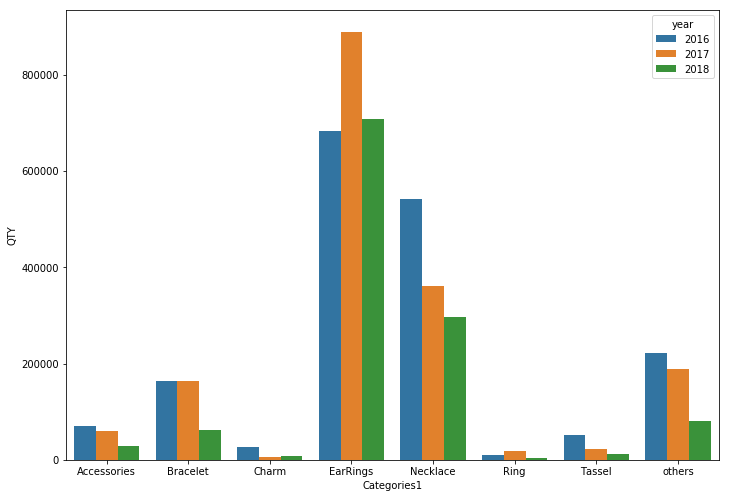

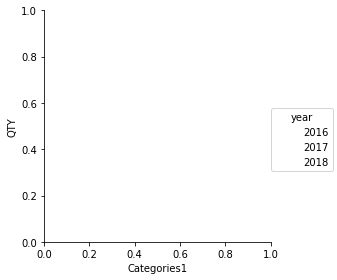

In [55]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.factorplot(ax = ax, x='Categories1', y='QTY', hue='year', data=Summary_categories, kind='bar')

In [ ]:
sale['UNIT PRICE'] = sale['UNIT PRICE'].str.replace('$', '')

In [ ]:
sale['UNIT PRICE'] = sale['UNIT PRICE'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
sale['EXT-AMT'] = sale['EXT-AMT'].str.replace('$', '')
sale['EXT-AMT'] = sale['EXT-AMT'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
sale['EXT-AMT'] = sale['EXT-AMT'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
sale['QTY'] = sale['QTY'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
sale.head(5)

In [ ]:
del(sale['Categories'])
del(sale['EXT-AMT'])

In [ ]:
sale.head(5)

In [ ]:
sale['cost_per_unit'] = sale['UNIT PRICE']*0.5

In [ ]:
sale.head(50)

In [ ]:
sale.loc[sale['UNIT PRICE'] < 0]

In [ ]:
sale.loc[sale['QTY'] < 0]

In [ ]:
sale['Revenue'] = sale['QTY']*sale['UNIT PRICE']

In [ ]:
sale.loc[sale['Revenue'] < 0]

In [ ]:
del(sale['EXT-AMT'])

In [ ]:
sale['Style_Color'] = sale['STYLE#']+sale['COLOR']

In [ ]:
Region_summary = pd.DataFrame(sale.groupby(['State_sold', 'Categories1'])['QTY'].sum())

In [ ]:
Region_summary

In [ ]:
sale['variable_cost'] = sale['Revenue']*0.5

In [ ]:
Customer_summary = pd.DataFrame(sale.groupby(['CUST #'])['Revenue'].sum())

In [ ]:
Top_10_Customer = Customer_summary.sort_values(by = 'Revenue', ascending = False).head(10)

In [ ]:
sale['variable_cost'] = pd.DataFrame(sale.groupby(['CUST #'])['Revenue'].sum())

In [ ]:
revenue_summary = pd.DataFrame(sale.groupby(['year'])['Revenue'].sum())
revenue_summary = revenue_summary.reset_index()

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x="year", y="Revenue", data=revenue_summary)

In [ ]:
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

In [ ]:
sale['Quarter'] = sale['month']

In [ ]:
sale.loc[sale['Quarter'].isin(Q1),'Quarter']='Q1'
sale.loc[sale['Quarter'].isin(Q2),'Quarter']='Q2'
sale.loc[sale['Quarter'].isin(Q3),'Quarter']='Q3'
sale.loc[sale['Quarter'].isin(Q4),'Quarter']='Q4'

In [ ]:
sale.head(5)

In [ ]:
sale['variable_cost_unit'] = sale['UNIT PRICE'] * 0.5

In [ ]:
sale.to_pickle('sales_latest_update.pkl')